# Machine Learning Model: Naive-Bayes

### Quick Links:
- [Notes](#Notes)
- [Application](#Application)

## Notes
This ml algorithm is mainly used as for classification tasks. Since this is a quick and simple classification method, it's good to use this as a first run model and see whether performance demands a more advanced classification model.

### Multinomial Naive Bayes

StatQuest: https://www.youtube.com/watch?v=O2L2Uv9pdDA

From my understanding, we begin with classfiying the amount of labels and assign a value for probability based on the training data. Then, we calculate the probabilities for each of the features in the training data for each of the labels provided. Once that is done, when we are predicting whether a new data point is part of one label or the other, we multiply the label probability (also known as the **prior probability**) by the feature probabilities (if the new data point falls within it) to get a score. Whichever combination of labels + features has the highest score, that's the label that the new data point will get! The formula looks something like:

$ score = p(label) \times p(feature_n) \times p(feature_{n+1}) $

Sometimes, we will see that a new data point has two or more features of the same instance, in which we case the number of instances will be the power by which we increase that score. Assuming we have $m$ instances of $ feature_{n+1}$, we would see the score written as:

$ score = p(label) \times p(feature_n) \times p(feature_{n+1})^m $

Additionally, we can add a $\alpha$, which prevents from the odd situation where there is no occurrence of a feature in one of the labels. This is considered a **pseudo count**.

**Naivety** comes into play because the method treats features as separate, individual components. It doesn't take into account the possible relationships between the features. Thus, we can say that the Naive Bayes has a **high bias** but a **low variance**.

### Gaussian Naive Bayes

StatQuest: https://www.youtube.com/watch?v=H3EjCKtlVog

The main difference I see between multinomial and gaussian naive bayes is that in gaussian, we are creating a gaussian distribution for each of the features. How many distributions we create is dependent on the number of features that we have. Once we have those distributions, we find the likelihood based on the new data point provided and then calculate a score similar to how we did in the multinomial naive bayes. The score that is the highest from all the labels will be the label that this new data point will get assigned.

Whenever we have a real low score, we can take the ***natural log** of the score to prevent **Underflow**, which is an issue when the computer loses accuracy tracking the number since it is so close to zero. 

Similar to multinomial naive bayes, the features are independent from each other and thus the method does not know how to rank features to determine which is best. What you can do to solve this problem is use **cross validation**!

### Pros and Cons - per Handbook

Pros:
- Extremely fast for both training and prediction
- Provide straightforward probabilistic prediction
- Are often very easily interpretable
- Have very few (if any) tunable parameters

Cons:
- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

# Application

For this project, we'll work with the heart failure dataset from kaggle: 

https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Per the kaggle description, we have the following information regarding the data:

> Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

>Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

>People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Additionally, here is a description for each of the provided features:

- age: How old the patient is
- anaemia: Decrease of red blood cells 
- creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
- diabetes: Patient has diabetes
- ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
- high_blood_pressure: Patient has high blood pressure
- platelets: Platelet count
- serum_creatinine: Level of serum creatinine in the blood (mg/dL)
- serum_sodium: Level of serum sodium in the blood (mEq/L)
- sex: Man/Woman
- smoking: Patient smokes
- time: Follow-up period (days)

In [9]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0%|                                               | 0.00/3.97k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 3.97k/3.97k [00:00<00:00, 6.20MB/s]


In [10]:
from zipfile import ZipFile
from pathlib import Path
import os

# Setup the title and create the data directory
title = 'heart-failure-clinical-data'
title_zip = title + '.zip'

# Set the data path
DATA_PATH = Path(os.path.join("..", "data", title))
DATA_PATH.mkdir(parents=True, exist_ok=True)

# Open the zip file and extract to the datapath
with ZipFile(title_zip, 'r') as zipObj:
   zipObj.extractall(DATA_PATH)

# Remove the zip file once complete
os.remove(title_zip)

In [11]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [12]:
# Read and check the data
df = pd.read_csv(os.path.join(DATA_PATH, 'heart_failure_clinical_records_dataset.csv'))
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
# There are several columns that are quite long so I want to rename them for the sake of being concise:
df.rename({'creatinine_phosphokinase': 'cp', 
           'ejection_fraction': 'ef', 
           'high_blood_pressure': 'hbp',
           'serum_sodium': 'ss',
           'serum_creatinine': 'sc',
           'DEATH_EVENT': 'death'}, 
          axis=1, 
          inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        299 non-null    float64
 1   anaemia    299 non-null    int64  
 2   cp         299 non-null    int64  
 3   diabetes   299 non-null    int64  
 4   ef         299 non-null    int64  
 5   hbp        299 non-null    int64  
 6   platelets  299 non-null    float64
 7   sc         299 non-null    float64
 8   ss         299 non-null    int64  
 9   sex        299 non-null    int64  
 10  smoking    299 non-null    int64  
 11  time       299 non-null    int64  
 12  death      299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Looks like we got no missing data and we have 299 patients that we're working with to make our predictions. Since this is not a tremendous amount of data, we will likely have to do some cross validation.

In [15]:
df.describe()

,age,anaemia,cp,diabetes,ef,hbp,platelets,sc,ss,sex,smoking,time,death
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Right off the bat there's a couple of items we should be weary of:

- cp: median and mean are quite off, meaning that there's some big outliers and that is further confirmed by the large standard deviation.
- death: only 1/3 of the cases resulted in death. While it'd be nice to have a 50/50 split, we can work with this.

# EDA 

Let's begin with some simple data exploration on the dataset.

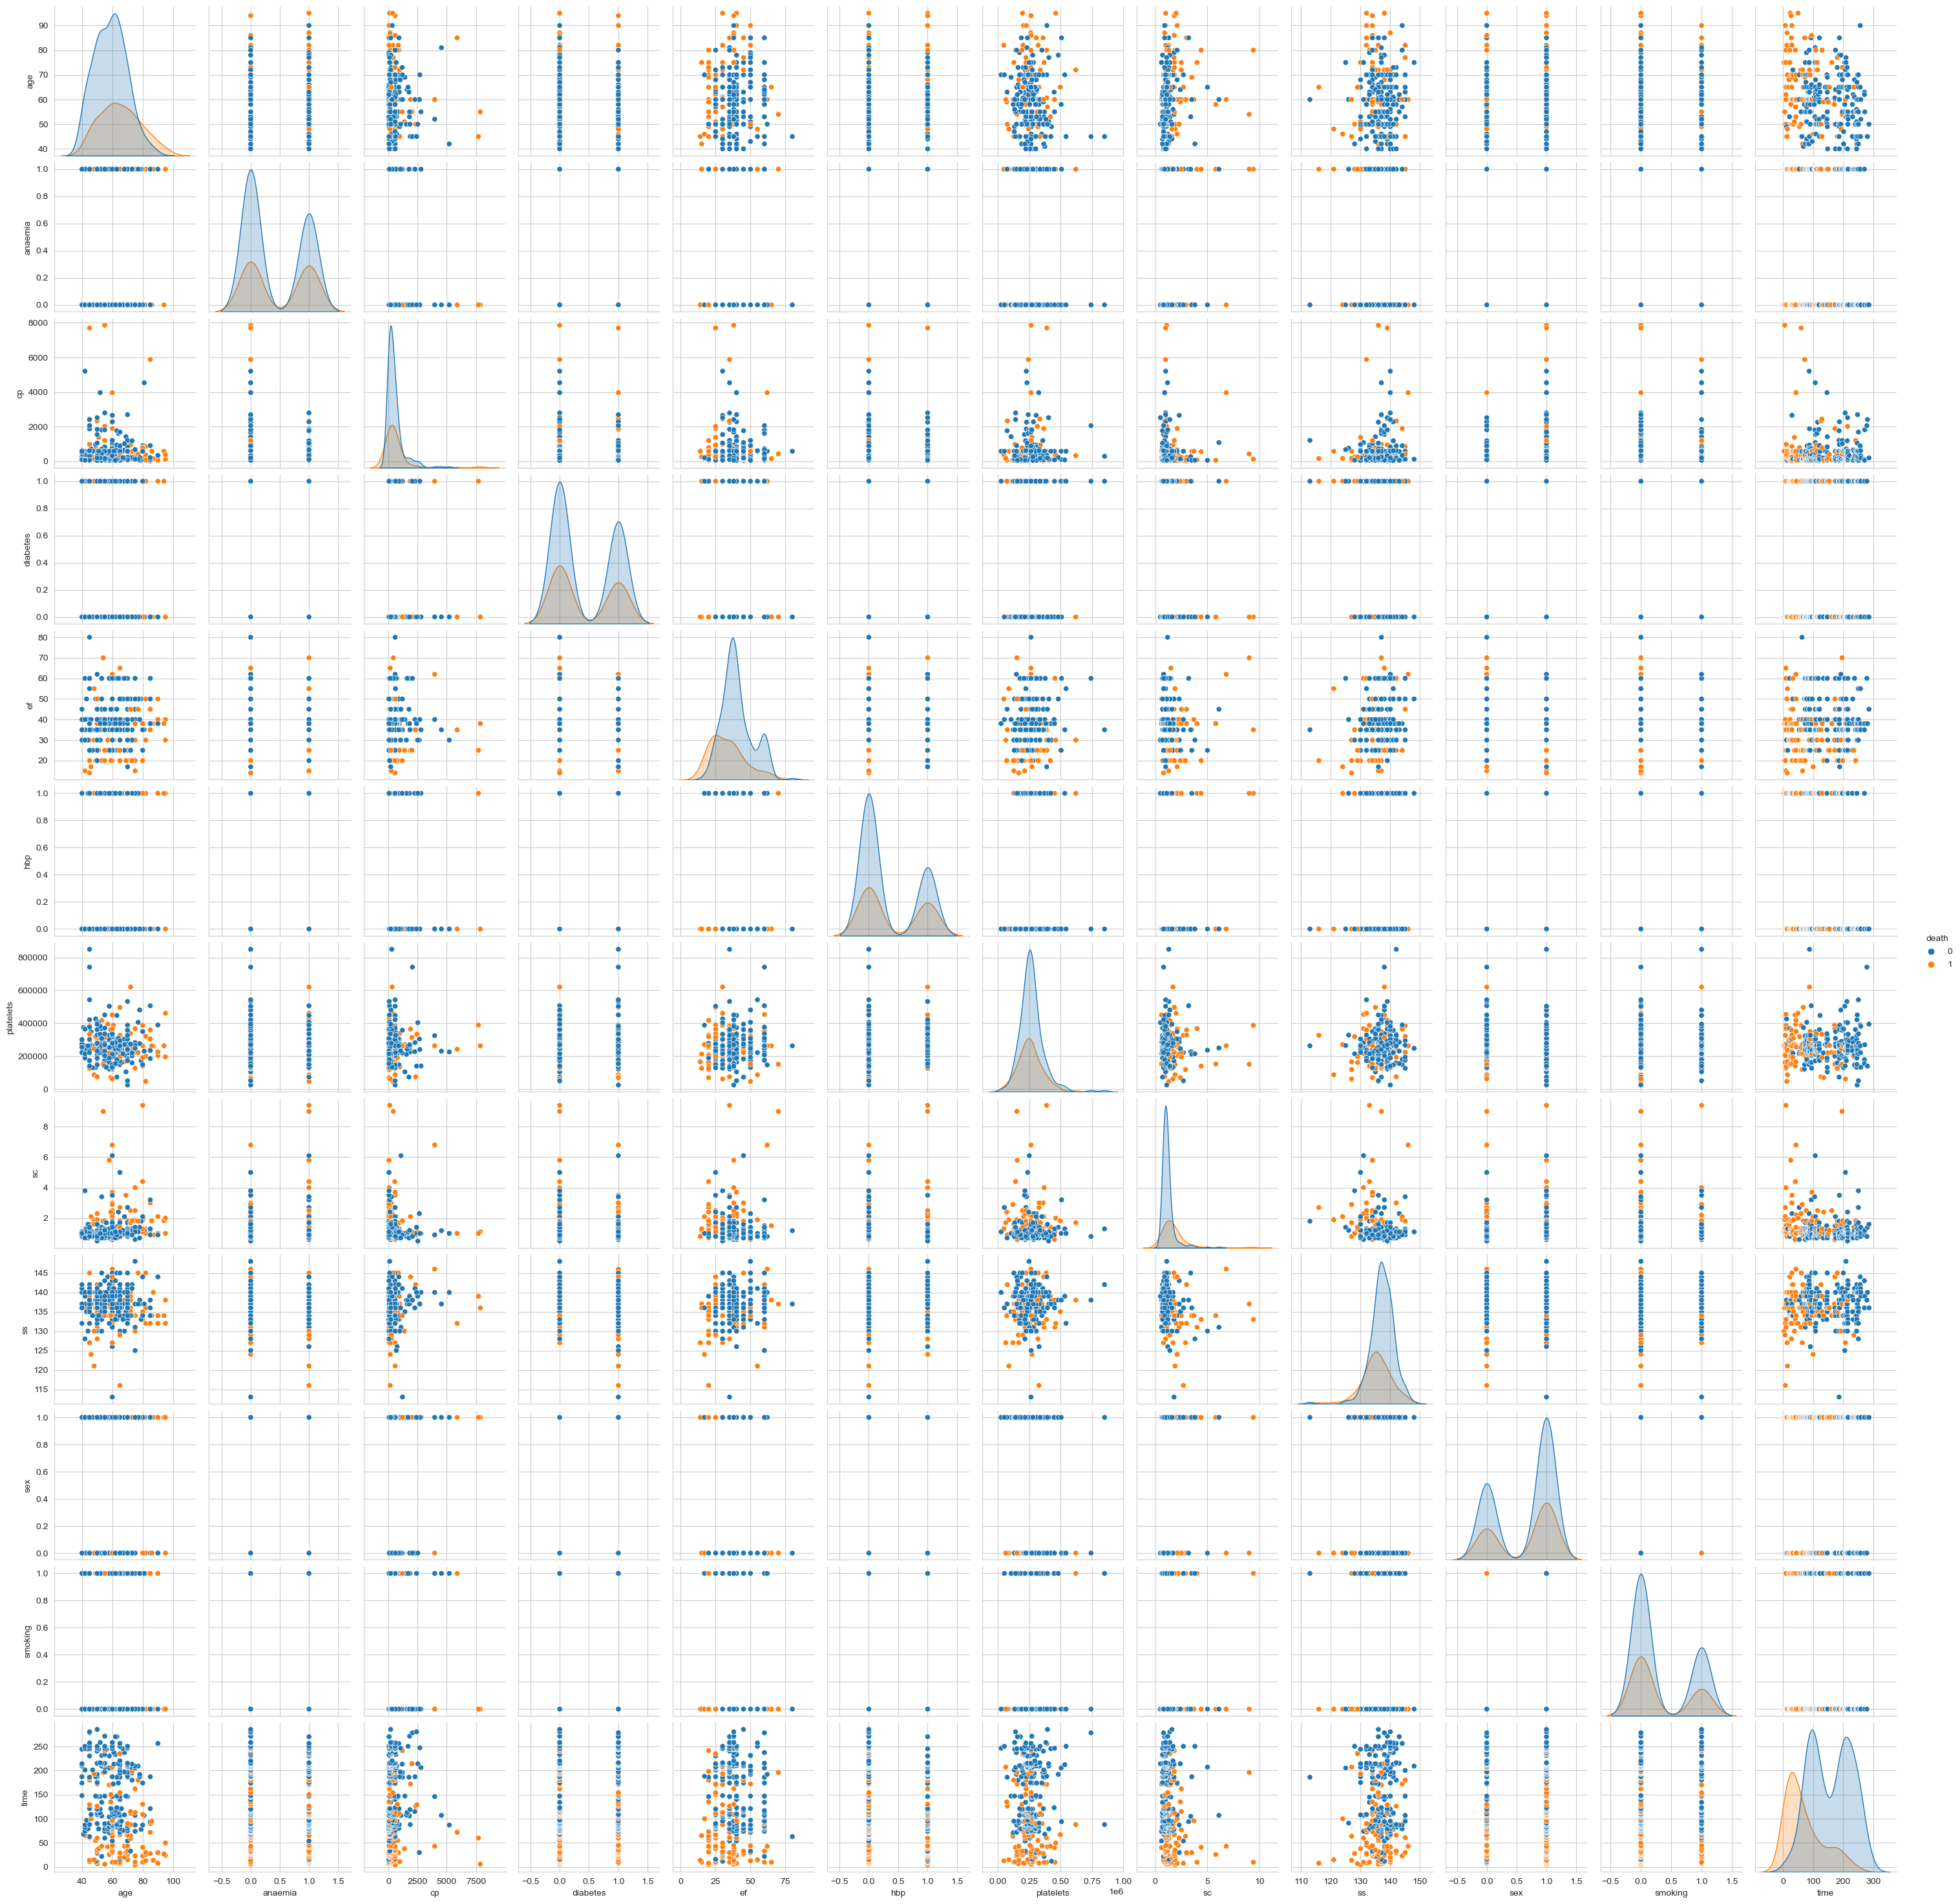

In [16]:
sns.pairplot(df, hue='death')

Overall the data looks normal. The only thing that I missed when first looking at the descriptive statistics is that the **sc** columns also has some large outliers we will have to deal with. Additionally, the **ss** columns has some outliters on th elow end we will have to manage.

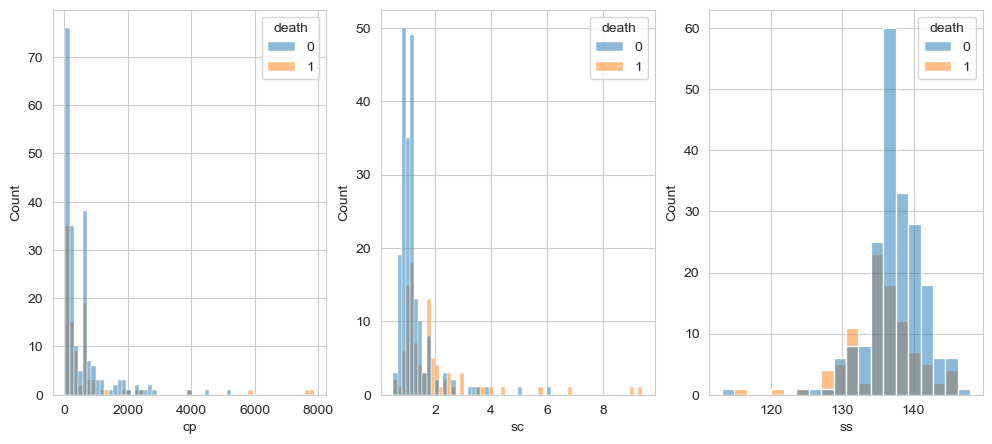

In [17]:
# Taking a closer look at the three columns with outliers mentioned prior:
fig, ax = plt.subplots(1, 3, figsize=(12,5))
for i, col in enumerate(['cp', 'sc', 'ss']):
    sns.histplot(x=df[col], hue=df['death'], ax=ax[i])

Upon further inspection, the **ss** column does not seem nearly as skewed as the **cp and sc** columns. For now, I'd like to leave it alone. 

w.r.t the other two columns, the highest values resuled in deaths - does that mean that having extremely high **cp and sc** values mean you will die? That'd be quite the conclusion and so we cannot say that with certainty, but I think it's important to keep these outliers in here since they do hold some truth.

In [19]:
# Let's look at how closely the other columns may be related:
df.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,cp,diabetes,ef,hbp,platelets,sc,ss,sex,smoking,time,death
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
cp,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ef,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
hbp,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
sc,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
ss,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


There is no alarming collinearity going on here which is always good to see. The highest ones being smoking and time to follow up, let's look at those two:

<AxesSubplot: xlabel='death', ylabel='time'>

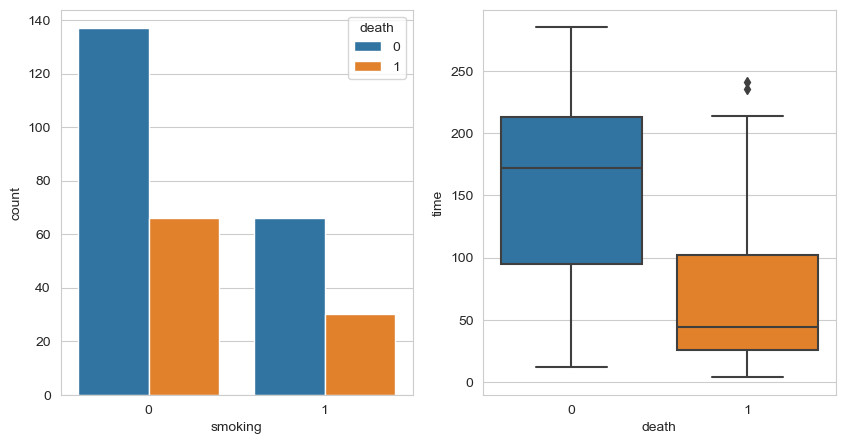

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='smoking', hue='death', data=df, ax=ax[0])
sns.boxplot(x='death', y='time', data=df, ax=ax[1])

What's most surprising here is that the death distribution between those who smoked and those who did not seem to be the same. 

<AxesSubplot: xlabel='age', ylabel='Count'>

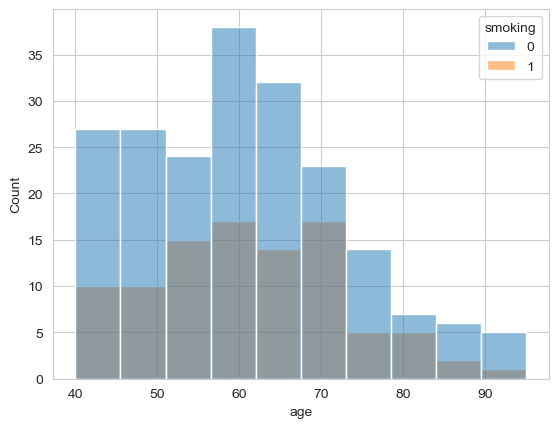

In [21]:
# For my own curiosity, I'd like to see the distribution of smokers across different age groups:
sns.histplot(x='age', hue='smoking', data=df)

Had forgotten that the youngest age here is 40 years. I was curious to look at this to see if there was the expected trend that the lower ages would have much fewer smokers.

**Anywho**, seeing that there's not much interesting interplay between the other columns and that the data is quite clean, we can move onto modeling :)

# Modeling

Since the purpose of this notebook is to further my understanding in the Naive Bayes classifier, I want to use that model. However, since there is a mix of both categorial and continuous data (as most data is in the real world), I had to search how to go about modeling this and found the following stack overflow thread:

https://stackoverflow.com/questions/14254203/mixing-categorial-and-continuous-data-in-naive-bayes-classifier-using-scikit-lea

Thus, I will do as the article suggested:

1. Create a Gaussian NB on the continuous data
2. Creata a Multinomial NB on the categorial data
3. Combine the resulting predict_proba and run a Gaussian NB with that new data

In [22]:
# Metric Imports
from sklearn.metrics import classification_report

# CV Imports
from sklearn.model_selection import cross_val_score, KFold, train_test_split

# Naive Bayes models
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [23]:
df.describe()

,age,anaemia,cp,diabetes,ef,hbp,platelets,sc,ss,sex,smoking,time,death
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Those columns with a max of 1 can be considered our categorial values.

In [24]:
# Splitting the data for Gaussian and Multinomial models
# Multi
df_categorial = df[['anaemia', 'diabetes', 'hbp', 'sex', 'smoking', 'death']]

# Gaussian
df_continuous = df[['age', 'cp', 'ef', 'platelets', 'sc', 'ss', 'time', 'death']]

### Multinomial Naive Bayes

In [25]:
# Prepare and split data for model 
X = df_categorial.drop('death', axis=1)
y = df_categorial.death

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Fit and predict 
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predictions = mnb.predict(X_test)

# Print out results
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != predictions).sum()))
print(classification_report(y_test, predictions))

# Predicting the probabilities 
multinomial_prob = mnb.predict_proba(X_test)

Number of mislabeled points out of a total 60 points : 15
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        45
           1       0.00      0.00      0.00        15

    accuracy                           0.75        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.56      0.75      0.64        60



/Users/eliastavarez/opt/anaconda3/envs/jupyter39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eliastavarez/opt/anaconda3/envs/jupyter39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eliastavarez/opt/anaconda3/envs/jupyter39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

### Gaussian Naive Bayes

In [26]:
# Prepare and split data for model 
X = df_continuous.drop('death', axis=1)
y = df_continuous.death

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Fit and predict
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)

# Print out results
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != predictions).sum()))
print(classification_report(y_test, predictions))

# Predicting the probabilities 
gaussian_prob = gnb.predict_proba(X_test)

Number of mislabeled points out of a total 60 points : 11
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        45
           1       0.67      0.53      0.59        15

    accuracy                           0.82        60
   macro avg       0.76      0.72      0.74        60
weighted avg       0.81      0.82      0.81        60



In [27]:
# Creating new training test set
X = np.hstack((multinomial_prob, gaussian_prob))
y = y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Fit and predict
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)

# Print out results
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != predictions).sum()))
print(classification_report(y_test, predictions))

Number of mislabeled points out of a total 12 points : 3
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.80      0.67      0.73         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12



That's it, our final model has an ok predictive power and we only use a few number of features, but the goal of this notebook was really just to learn more about Naive Bayes and then apply it with a quick example : )